In [2]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import graphviz

## 데이터 셋 설명

- date : Date and Timestampe (170303 ~ 170909)

- (flotation cell(부선기) =  부유선광 공정에서 광석안에 있는 추출하고자 하는 금속성 광물을 띄워 올려 추출하는 장비)

- % Iron Feed : % of Iron that comes from the iron ore that is being fed into the flotation cells

- % Silica Feed : % of silica (impurity) that comes from the iron ore that is being fed into the flotation cells

- Starch Flow : (포수제로 사용) Starch (reagent) Flow measured in m3/h

(포수제 = 광물입자와 기포와의 기계적 운동이나 역학적 포획작용을 주는 것이 아니고 광물표면을 소수성으로 만들어 주는 시약)

- Anima Flow : (기포제로 사용) Amina (reagent) Flow measured in m3/h

(기포제 = 액체(보통 물)에 녹여, 거품의 생성을 촉진하는 물질)

(Ore Pulp = 분쇄한 광석에 적당량의 물을 더해 유동 상태 혹은 현탁 상태로 한 것, 광석류를 파이프 수송할 경우에 사용)

- Ore Pulp Flow : tone / hour

- Ore Pulp pH : pH scale from 0 to 14

- Ore Pulp Density : Density scale from 1 to 3 kg/cm³

(1 Nm³ = (760/P) ((T+273)/298) m³)

- Flotation Column Air Flow : Air flow that goes into the flotation cell measured in Nm³/h

- Flotation Column Level : Froth level in the flotation cell measured in mm (millimeters)

- % Iron Concentrate : % of Iron which represents how much iron is presented in the end of the flotation process (0-100%, lab measurement)

- % Silica Concentrate : % of silica which represents how much iron is presented in the end of the flotation process (0-100%, lab measurement)

## Data Loading

In [3]:
df = pd.read_csv("D:\\dataset\\Mining\\MiningProcess_Flotation_Plant_Database.csv",decimal=",",index_col='date',parse_dates=["date"],
                 infer_datetime_format=True).drop_duplicates()

In [4]:
df.columns = ['b_Iron','b_Silica','Starch_Flow','Anima_Flow','Ore_Pulp_Flow','Ore_Pulp_pH','Ore_Pulp_Density',
             'air_1','air_2','air_3','air_4','air_5','air_6','air_7','froth_1','froth_2','froth_3','froth_4','froth_5','froth_6','froth_7',
             'a_Iron', 'a_Silica']

In [5]:
df

,b_Iron,b_Silica,Starch_Flow,Anima_Flow,Ore_Pulp_Flow,Ore_Pulp_pH,Ore_Pulp_Density,air_1,air_2,air_3,...,air_7,froth_1,froth_2,froth_3,froth_4,froth_5,froth_6,froth_7,a_Iron,a_Silica
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71


## Multicollinearity

In [6]:
from patsy import *
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
y, X = dmatrices('a_Silica ~ b_Iron + b_Silica + Starch_Flow + Anima_Flow + Ore_Pulp_Flow + Ore_Pulp_pH + Ore_Pulp_Density + air_1 + air_2 + air_3 + air_4 + air_5 + air_6 + air_7 + froth_1 + froth_2 + froth_3 + froth_4 + froth_5 + froth_6 + froth_7',data=df, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,41235.9,Intercept
1,19.3,b_Iron
2,19.1,b_Silica
3,1.3,Starch_Flow
4,2.2,Anima_Flow
5,1.2,Ore_Pulp_Flow
6,1.2,Ore_Pulp_pH
7,2.0,Ore_Pulp_Density
8,12.3,air_1
9,4.3,air_2


In [10]:
df.drop(['b_Iron', 'b_Silica','air_1','air_3'], axis='columns', inplace=True)

KeyError: "['b_Iron' 'b_Silica' 'air_1' 'air_3'] not found in axis"

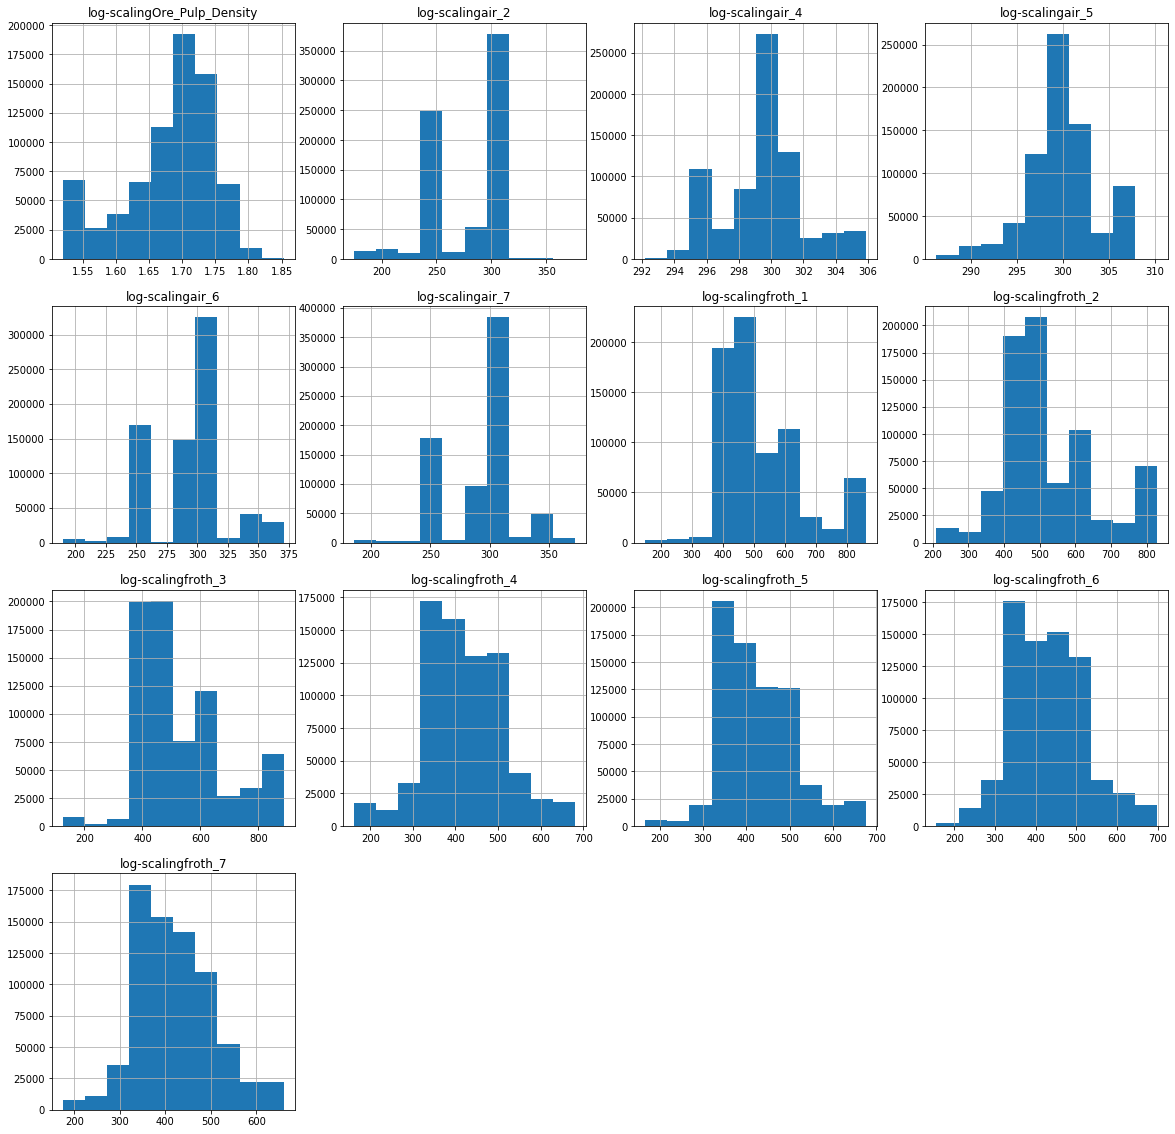

In [11]:
## 변수들 분포 확인

plt.figure(figsize=(20,20))
for i in range(4,17):
    plt.subplot(4,4,i-3)
    plt.title('log-scaling'+df.columns[i])
    df.iloc[:,i].hist()

In [12]:
## Transform to normal distribution
cols = df.columns.tolist()
    
for i in cols:
    df[i] = (df[i]-df[i].mean())/df[i].std()

In [13]:
df

,Starch_Flow,Anima_Flow,Ore_Pulp_Flow,Ore_Pulp_pH,Ore_Pulp_Density,air_2,air_4,air_5,air_6,air_7,froth_1,froth_2,froth_3,froth_4,froth_5,froth_6,froth_7,a_Iron,a_Silica
date,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,0.123266,0.759070,-0.191412,0.772479,0.860854,-0.792060,-1.690189,1.783104,-1.383562,-1.389187,-0.478865,-0.698767,-0.704489,0.254897,0.913367,0.183280,1.206534,1.663420,-0.903745
2017-03-10 01:00:00,0.127279,0.830639,-0.019343,0.774545,0.860854,-0.881690,-1.690189,1.783104,-1.386472,-1.455063,-0.520860,-0.725300,-0.651584,0.304245,0.843622,0.178298,0.908899,1.663420,-0.903745
2017-03-10 01:00:00,0.142945,0.875448,0.216091,0.776611,0.860854,-0.969829,-1.690189,1.783104,-1.346526,-1.487234,-0.525827,-0.418264,-0.640513,0.321704,0.702143,0.199472,0.443547,1.663420,-0.903745
2017-03-10 01:00:00,0.146152,0.882143,0.037944,0.778936,0.860854,-0.750544,-1.690189,1.783104,-1.377047,-1.380021,-0.516665,-0.502201,-0.585819,0.283799,0.548259,0.086750,0.079609,1.663420,-0.903745
2017-03-10 01:00:00,0.134910,0.767102,0.276470,0.781002,0.860854,-0.828502,-1.690189,1.783104,-1.391564,-1.457363,-0.516665,-0.543264,-0.535081,0.365102,0.443937,0.153387,0.056169,1.663420,-0.903745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 23:00:00,-0.130505,-0.516288,-1.133460,-0.377154,-0.386874,0.718396,0.184079,-0.080235,1.809717,0.800072,-0.976524,-0.716394,2.257470,-0.015746,0.857649,0.183136,-0.047330,-0.696417,-0.548384
2017-09-09 23:00:00,-0.146072,-0.161412,-1.301510,-0.378859,-0.388753,0.820959,0.102488,0.151274,1.255145,-1.883567,-0.905234,-0.919847,2.207123,-0.019538,0.962408,-0.632727,0.063920,-0.696417,-0.548384
2017-09-09 23:00:00,-0.145916,0.135034,-1.450190,-0.383740,-0.390776,1.003934,0.186799,-0.057139,1.240827,-2.260730,-0.848829,-0.961183,2.228252,-0.006961,0.927086,-1.043761,0.143932,-0.696417,-0.548384


In [14]:
df_mean = df.copy()
mean_grpby = df_mean.groupby(['date']).mean()

In [15]:
mean_grpby

,Starch_Flow,Anima_Flow,Ore_Pulp_Flow,Ore_Pulp_pH,Ore_Pulp_Density,air_2,air_4,air_5,air_6,air_7,froth_1,froth_2,froth_3,froth_4,froth_5,froth_6,froth_7,a_Iron,a_Silica
date,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,0.240941,0.993060,0.121852,0.894096,0.709973,-0.891834,-1.690189,1.783104,-1.350245,-1.412743,-0.532358,-0.590124,-0.535402,0.324148,0.363375,0.383607,0.348914,1.663420,-0.903745
2017-03-10 02:00:00,0.216789,0.537554,0.237092,0.936078,-0.182639,-0.892234,-1.690189,1.783104,-1.393995,-1.423569,-0.540066,-0.563937,-0.538008,0.328688,0.279696,0.284832,0.358984,1.797502,-1.081425
2017-03-10 03:00:00,0.501511,1.136835,0.122928,0.725997,0.755528,-0.895877,-1.690189,1.783104,-1.382994,-1.403123,-0.535493,-0.559107,-0.532571,0.337592,0.308238,0.334652,0.346134,1.717053,-0.939281
2017-03-10 04:00:00,0.294732,1.150679,0.236594,0.390776,0.731614,-0.892542,-1.690189,1.783104,-1.396784,-1.414505,-0.245852,-0.242506,-0.290837,0.810395,0.835348,0.810439,0.871971,1.520400,-0.859325
2017-03-10 05:00:00,0.376347,1.441522,0.210640,-0.054977,1.234800,-0.894009,-1.690189,1.783104,-1.382748,-1.417258,0.220185,0.213919,0.120424,1.414687,1.472765,1.454708,1.523708,1.413134,-0.877093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,0.376155,0.099126,-1.723109,-1.526823,-0.282529,0.764260,0.196182,0.002568,1.441484,0.278704,-0.933639,-0.185639,-0.844254,-0.231476,0.921851,-0.338309,-0.239705,0.000808,-0.601688
2017-09-09 20:00:00,1.115250,0.227916,-1.695734,-0.980882,0.167215,0.757585,0.200971,0.012384,1.855311,0.448189,-0.917260,-0.178654,-0.875065,-0.220178,0.905904,-0.344580,-0.240568,-0.195845,-0.548384
2017-09-09 21:00:00,-0.050511,0.324185,-1.700729,0.010233,0.797951,0.752071,0.161430,0.003254,1.896645,0.666943,-0.917010,-0.172134,-0.393928,-0.220572,0.889317,-0.311275,-0.239742,-0.678539,-0.468428


In [19]:
## 첫날이 01시 부터 시작되어 00시를 하나 만들어서 추가해준다.(일마다 24개의 데이터를 만들기 위해)
pd_ts = pd.Timestamp(2017, 3, 10, 0, 0, 0)

copy = []
tmp = mean_grpby.columns.tolist()

for i in range(len(tmp)):
    copy.append(mean_grpby.iloc[0,i])

    
make_missing = pd.DataFrame(index=range(0), columns=tmp)    
make_missing.loc[pd_ts] = copy

In [21]:
concat_missing = pd.concat([make_missing, mean_grpby])

In [22]:
concat_missing

,Starch_Flow,Anima_Flow,Ore_Pulp_Flow,Ore_Pulp_pH,Ore_Pulp_Density,air_2,air_4,air_5,air_6,air_7,froth_1,froth_2,froth_3,froth_4,froth_5,froth_6,froth_7,a_Iron,a_Silica
2017-03-10 00:00:00,0.240941,0.993060,0.121852,0.894096,0.709973,-0.891834,-1.690189,1.783104,-1.350245,-1.412743,-0.532358,-0.590124,-0.535402,0.324148,0.363375,0.383607,0.348914,1.663420,-0.903745
2017-03-10 01:00:00,0.240941,0.993060,0.121852,0.894096,0.709973,-0.891834,-1.690189,1.783104,-1.350245,-1.412743,-0.532358,-0.590124,-0.535402,0.324148,0.363375,0.383607,0.348914,1.663420,-0.903745
2017-03-10 02:00:00,0.216789,0.537554,0.237092,0.936078,-0.182639,-0.892234,-1.690189,1.783104,-1.393995,-1.423569,-0.540066,-0.563937,-0.538008,0.328688,0.279696,0.284832,0.358984,1.797502,-1.081425
2017-03-10 03:00:00,0.501511,1.136835,0.122928,0.725997,0.755528,-0.895877,-1.690189,1.783104,-1.382994,-1.403123,-0.535493,-0.559107,-0.532571,0.337592,0.308238,0.334652,0.346134,1.717053,-0.939281
2017-03-10 04:00:00,0.294732,1.150679,0.236594,0.390776,0.731614,-0.892542,-1.690189,1.783104,-1.396784,-1.414505,-0.245852,-0.242506,-0.290837,0.810395,0.835348,0.810439,0.871971,1.520400,-0.859325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,0.376155,0.099126,-1.723109,-1.526823,-0.282529,0.764260,0.196182,0.002568,1.441484,0.278704,-0.933639,-0.185639,-0.844254,-0.231476,0.921851,-0.338309,-0.239705,0.000808,-0.601688
2017-09-09 20:00:00,1.115250,0.227916,-1.695734,-0.980882,0.167215,0.757585,0.200971,0.012384,1.855311,0.448189,-0.917260,-0.178654,-0.875065,-0.220178,0.905904,-0.344580,-0.240568,-0.195845,-0.548384
2017-09-09 21:00:00,-0.050511,0.324185,-1.700729,0.010233,0.797951,0.752071,0.161430,0.003254,1.896645,0.666943,-0.917010,-0.172134,-0.393928,-0.220572,0.889317,-0.311275,-0.239742,-0.678539,-0.468428
2017-09-09 22:00:00,0.264684,0.047622,-1.764549,0.038241,0.523374,0.748023,0.193473,0.006104,1.902954,0.505883,-0.919756,-0.186722,2.020736,-0.214857,0.891483,-0.302339,-0.225458,-0.714294,-0.326283


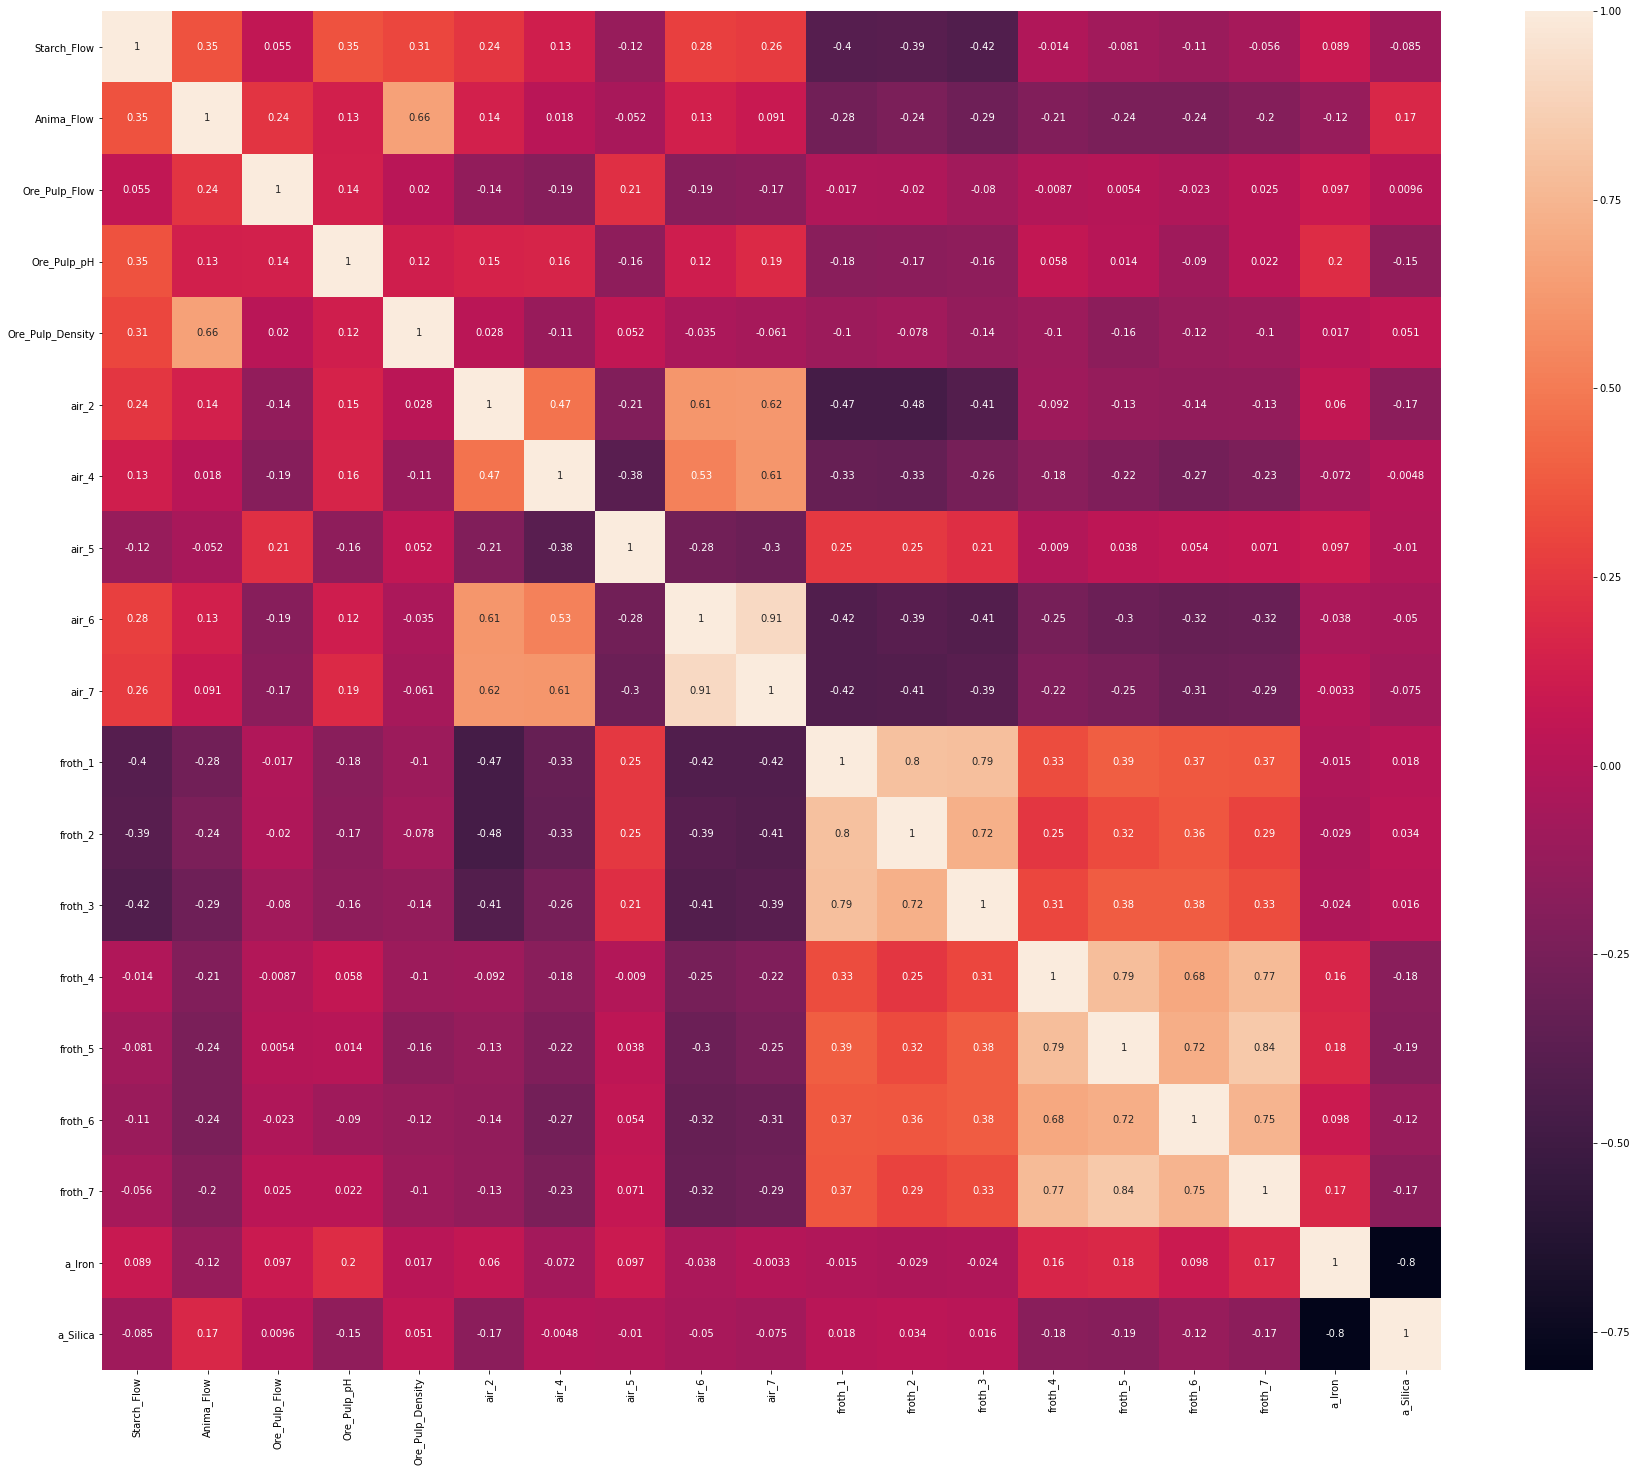

In [24]:
plt.figure(figsize=(30, 25))
p = sns.heatmap(concat_missing.corr(), annot=True)

In [25]:
X,y = concat_missing.iloc[:,0:-2], concat_missing.iloc[:,-1]